In [13]:
# Step 1: Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [14]:
# Step 2: Define Parameters
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32
EPOCHS = 20  # Increase for better results
repo_path = "Tree_species"  # Your dataset path

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# 2. Set the path to your dataset folder
data_dir = '/content/drive/MyDrive/Tree_Species_Dataset'

In [17]:
# 3. Confirm it's loaded correctly by listing the classes
import os

print("Classes found in the dataset:")
print(os.listdir(data_dir))

Classes found in the dataset:
['gulmohor', 'vad', 'kanchan', 'kesudo', 'sitafal', 'jamun', 'gunda', 'saptaparni', 'coconut', 'bili', 'pilikaren', 'garmalo', 'bamboo', 'mango', 'banyan', 'simlo', 'pipal', 'champa', 'amla', 'other', 'motichanoti', 'babul', 'shirish', 'nilgiri', 'neem', 'sonmahor', 'khajur', 'sugarcane', 'cactus', 'asopalav']


In [18]:
# 4. Set up data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height = 150
img_width = 150
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

In [20]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
epochs = 50

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.0749 - loss: 3.5193 - val_accuracy: 0.1155 - val_loss: 3.2455
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.1053 - loss: 3.2518 - val_accuracy: 0.1227 - val_loss: 3.0619
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.1209 - loss: 3.0700 - val_accuracy: 0.1264 - val_loss: 3.1557
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.1380 - loss: 3.1163 - val_accuracy: 0.1913 - val_loss: 2.9010
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.1560 - loss: 2.9514 - val_accuracy: 0.1769 - val_loss: 2.8586
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.1991 - loss: 2.8305 - val_accuracy: 0.2347 - val_loss: 2.7120
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.2245 - loss: 2.6648 - val_accuracy: 0.2310 - val_loss: 2.7361
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.2854 - loss: 2.5220 - val_accuracy: 0.2599 - val_loss:

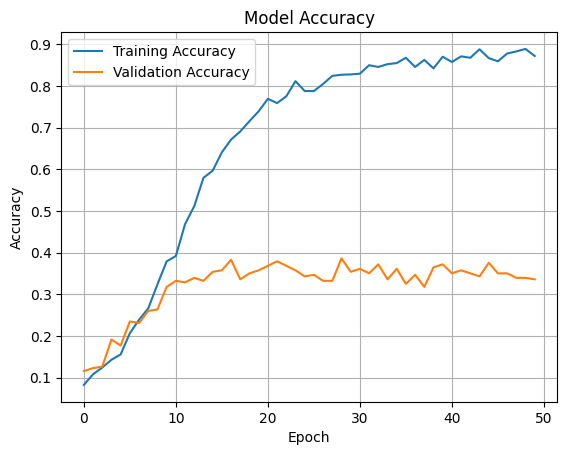

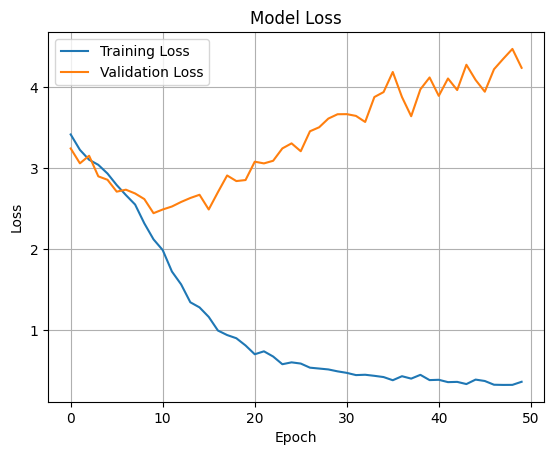

In [22]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
model.save("/content/drive/MyDrive/tree_species_cnn_model.keras")